In [61]:
import tensorflow as tf
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from matplotlib import pyplot as plt



In [62]:
df = pd.read_csv("data/admission_predict.csv")
df = df.drop(['Serial No.'], axis=1)

y = df['Chance of Admit'].to_numpy()
y = np.reshape(y, (y.shape[0], 1))

features = df.drop(["Chance of Admit"], axis=1).to_numpy()

np.random.seed(1337)
tf.set_random_seed(1337)



In [63]:
NUM_FEATURES = 7
NUM_NEURON = 10

learning_rate = 10**-3
beta = 10**-3

epochs = 1500
batch_size = 8



In [64]:
x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=42)

In [65]:
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [66]:
#Create model
#7 inputs, 1 output

X = tf.placeholder(tf.float32, [None, NUM_FEATURES])
Y = tf.placeholder(tf.float32, [None, 1])

In [67]:
weights = {
    'h1': tf.Variable(tf.truncated_normal([NUM_FEATURES, NUM_NEURON], seed=1337, stddev=1.0 / np.sqrt(NUM_FEATURES), dtype=tf.float32)),
    'out': tf.Variable(tf.truncated_normal([NUM_NEURON, 1], seed=1337, stddev=1.0 / np.sqrt(NUM_FEATURES), dtype=tf.float32))# 1 ouput label
}

biases = {
    'b1': tf.Variable(tf.random_normal([NUM_NEURON], seed=1337)),
    'out': tf.Variable(tf.random_normal([1], seed=1337))
}

In [68]:
def neural_net(x):
    #hidden layer 1
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1) #activation function
    
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    return (out_layer)

In [69]:
#predicted value
Y_hat = neural_net(X)

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
loss = tf.reduce_mean(tf.square(Y - Y_hat)) 
reg = tf.nn.l2_loss(weights['h1']) + tf.nn.l2_loss(weights['out'])


train_op = optimizer.minimize(loss + reg * beta)

In [70]:
#Train the model with x-train
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    batch_train_err = []
    test_err = []
    for i in range(epochs):
        
        #Batch training
        #pick random batch_size data points from x_train
        rand_index = np.random.choice(x_train.shape[0], size=batch_size)
        x_batch = x_train[rand_index]
        y_batch = y_train[rand_index]
        
        train_op.run(feed_dict={X:x_batch, Y:y_batch})
        err = loss.eval(feed_dict={X: x_batch, Y: y_batch})
          
        if(i%10==0):
            batch_train_err.append(err)
            
            #For Q1a)
            test_err.append(loss.eval(feed_dict={X: x_test, Y: y_test}))   
            print('iter %d: train error %g, test error %g'%(i, batch_train_err[-1], test_err[-1]))
             
    
    
    #Q1c) Select 50 x_test samples
    sample_index = np.random.choice(x_test.shape[0], size=50)
    x_test_sample = x_test[sample_index]
    y_test_sample = y_test[sample_index]
    #plot y_hat and y_test

    pred = sess.run(Y_hat, feed_dict={X:x_test_sample})


iter 0: train error 9.3, test error 8.54966
iter 10: train error 8.02962, test error 7.36893
iter 20: train error 6.90951, test error 6.41343
iter 30: train error 5.3982, test error 5.58089
iter 40: train error 4.79163, test error 4.85814
iter 50: train error 4.15281, test error 4.24817
iter 60: train error 4.60824, test error 3.71742
iter 70: train error 3.31455, test error 3.24344
iter 80: train error 3.34525, test error 2.81113
iter 90: train error 2.41018, test error 2.44729
iter 100: train error 1.52633, test error 2.14005
iter 110: train error 2.41815, test error 1.86631
iter 120: train error 1.74378, test error 1.62848
iter 130: train error 1.51629, test error 1.41669
iter 140: train error 1.13146, test error 1.23051
iter 150: train error 0.647419, test error 1.07993
iter 160: train error 0.595152, test error 0.946687
iter 170: train error 1.05781, test error 0.826246
iter 180: train error 0.914333, test error 0.722551
iter 190: train error 0.55785, test error 0.63695
iter 200: 

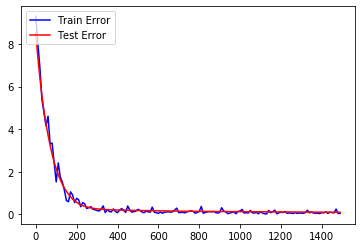

In [71]:
#Q1a plot train err against test err
plt.plot(range(0, epochs, 10), batch_train_err, color='blue', label='Train Error')
plt.plot(range(0, epochs, 10), test_err, color ='red', label='Test Error')
plt.legend(loc='upper left')

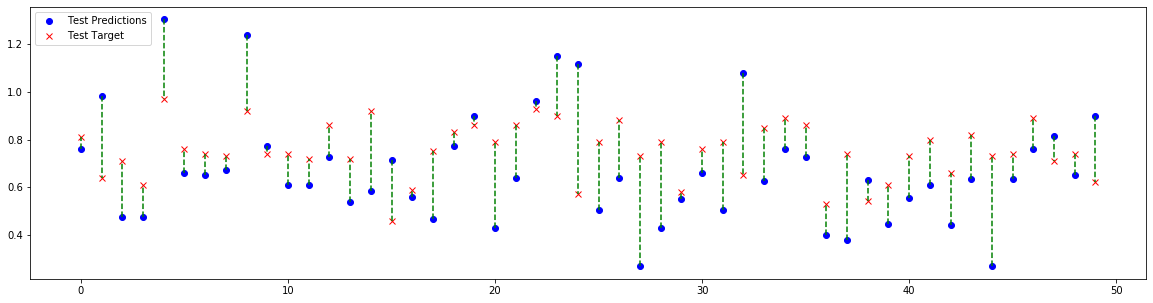

In [72]:
plt.figure(figsize=(20,5))

plt.plot(pred, color='blue', linestyle='', marker='o', label='Test Predictions')
plt.plot(y_test_sample, color='red', linestyle='', marker='x', label='Test Target')

zipped_list = zip(pred.tolist(), y_test_sample.tolist())


#connects the dots between the preidction and target 
for index, line in enumerate(zipped_list):
    x = [index, index]
    plt.plot(x, line, linestyle='--', color='green')
    
plt.legend(loc='upper left')